In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Normalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [2]:
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [42]:
data = pd.read_csv('Dato 4.csv')
data.head()

,Arena de cuarzo,Tetracloruro de silicio (> 99%),Electricidad,Vapor,Agua,Carburo de silicio,Plata,Electricidad.1,Vidrio,Aluminio,...,Electricidad.3,Combustible diésel,Metal de silicio (grado metalúrgico),Plata.1,Human health (total),Ecosystems (total),Resources (total),Human health (recycling),Ecosystems (recycling),Resources (recycling)
0,38,8.1,2653,417,499,183,76,789,64,14,...,9.5,37,3.3,78,0.006573,0.000019,94.343988,-0.000008,-9.900000e-09,0.072561
1,41,9.9,2682,408,498,166,63,756,60,13,...,7.9,31,3.4,66,0.006360,0.000019,89.776952,-0.000008,-9.480000e-09,0.044545
2,46,9.6,1899,317,565,183,77,736,71,10,...,8.0,34,2.5,74,0.006370,0.000019,91.499675,-0.000008,-9.210000e-09,0.062594
3,46,8.5,2244,363,447,170,80,650,69,10,...,7.9,40,3.2,81,0.006340,0.000019,85.961742,-0.000008,-9.960000e-09,0.087927
4,48,7.2,2321,457,546,142,63,711,71,13,...,10.6,41,3.0,81,0.005990,0.000017,83.108647,-0.000008,-9.710000e-09,0.097153


In [43]:
X = data.iloc[:, :19].values
y = data.iloc[:, 19:].values

In [44]:
y

array([[ 6.5732750e-03,  1.9400000e-05,  9.4343988e+01, -8.2600000e-06,
        -9.9000000e-09,  7.2561363e-02],
       [ 6.3600000e-03,  1.8900000e-05,  8.9776952e+01, -7.6700000e-06,
        -9.4800000e-09,  4.4544858e-02],
       [ 6.3700000e-03,  1.9000000e-05,  9.1499675e+01, -7.8000000e-06,
        -9.2100000e-09,  6.2593606e-02],
       ...,
       [ 6.4700000e-03,  1.9000000e-05,  9.4730156e+01, -8.0600000e-06,
        -9.8000000e-09,  5.1672694e-02],
       [ 6.3100000e-03,  1.9100000e-05,  8.5245930e+01, -7.7700000e-06,
        -9.4900000e-09,  6.0990977e-02],
       [ 6.5100000e-03,  1.9100000e-05,  9.3190137e+01, -7.6800000e-06,
        -9.1100000e-09,  5.3109238e-02]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [49]:
normalizador = crear_normalizador(X_train)

In [50]:
normalizador

In [51]:
def crear_nn_regresion(norm):
    model = Sequential([
        norm,
        Dropout(0.2),
        Dense(128, activation='sigmoid'),
        Dropout(0.2),
        Dense(64, activation='linear'),
        Dense(6)
    ])
    model.compile(loss='mean_absolute_error', optimizer=Adam(0.001))
    return model

In [52]:
nn = crear_nn_regresion(normalizador)

In [53]:
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1,
    epochs=200
)

Epoch 1/200
11/11 [==============================] - 1s 21ms/step - loss: 15.2451 - val_loss: 14.6761
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 14.4195 - val_loss: 13.8066
Epoch 3/200
11/11 [==============================] - 0s 6ms/step - loss: 13.5666 - val_loss: 12.8563
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 12.5627 - val_loss: 11.7690
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 11.3318 - val_loss: 10.3439
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 9.8248 - val_loss: 8.6947
Epoch 7/200
11/11 [==============================] - 0s 6ms/step - loss: 7.9568 - val_loss: 6.6924
Epoch 8/200
11/11 [==============================] - 0s 7ms/step - loss: 5.8259 - val_loss: 4.3594
Epoch 9/200
11/11 [==============================] - 0s 8ms/step - loss: 3.1713 - val_loss: 1.6346
Epoch 10/200
11/11 [==============================] - 0s 6ms/step - loss: 1.3164 - val_loss: 0.934

In [54]:
nn.evaluate(X_test, y_test, verbose=0)

0.18988734483718872

In [55]:
# Creación de predicciones
y_pred = nn.predict(X_test).flatten()

4/4 [==============================] - 0s 3ms/step


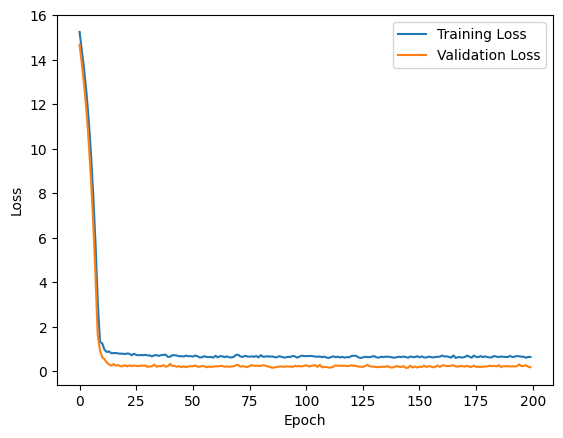

In [66]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
input_data = np.array([[50,9.6,2263,336,521,152,59,759,60,14,2.2,7.1,78,4.4,19,10.9,42,2.8,65]])
output = nn.predict(input_data)
print(output)

1/1 [==============================] - 0s 33ms/step
[[6.0120141e-03 1.3842378e-03 8.5412689e+01 2.0928094e-03 3.7499569e-02
  6.7299217e-02]]
